In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:

df = pd.read_csv('verify2.csv', delimiter=';')
df.fillna(0, inplace=True)

In [3]:
df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,0.0,0.0,10003.0,0.000000
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,0.0,0.0,5003,31,0.0,0.0,0.0,0.0,5002.5,0.000000
2,-2,100,AMETHYSTS,9996,2,9995.0,22.0,0.0,0.0,10004,2,10005.0,22.0,0.0,0.0,10000.0,0.000000
3,-2,100,STARFRUIT,4997,24,0.0,0.0,0.0,0.0,5003,2,5004.0,22.0,0.0,0.0,5000.0,0.000000
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,0.0,0.0,5003,20,0.0,0.0,0.0,0.0,5000.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-2,199700,AMETHYSTS,9998,8,9996.0,2.0,9995.0,25.0,10004,2,10005.0,25.0,0.0,0.0,10001.0,848.000000
3996,-2,199800,STARFRUIT,4949,21,0.0,0.0,0.0,0.0,4956,21,0.0,0.0,0.0,0.0,4952.5,800.342773
3997,-2,199800,AMETHYSTS,9995,21,0.0,0.0,0.0,0.0,10002,8,10005.0,21.0,0.0,0.0,9998.5,848.000000
3998,-2,199900,STARFRUIT,4950,32,0.0,0.0,0.0,0.0,4954,7,4956.0,32.0,0.0,0.0,4952.0,799.995117


In [4]:
df.columns.to_list()

['day',
 'timestamp',
 'product',
 'bid_price_1',
 'bid_volume_1',
 'bid_price_2',
 'bid_volume_2',
 'bid_price_3',
 'bid_volume_3',
 'ask_price_1',
 'ask_volume_1',
 'ask_price_2',
 'ask_volume_2',
 'ask_price_3',
 'ask_volume_3',
 'mid_price',
 'profit_and_loss']

Text(0, 0.5, 'Profits')

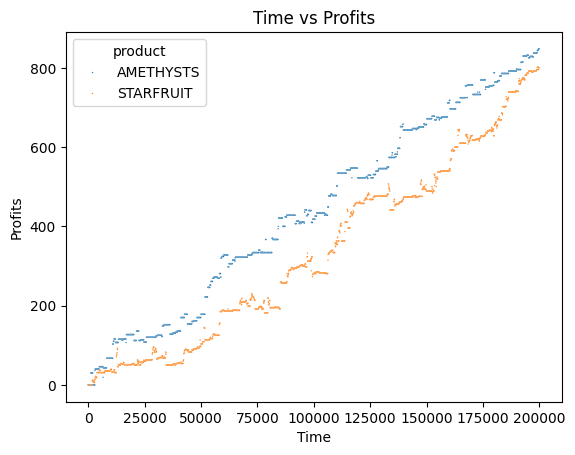

In [5]:
sns.scatterplot(data=df, x='timestamp', y='profit_and_loss', hue='product', s = 1)
plt.title('Time vs Profits')
plt.xlabel('Time')
plt.ylabel('Profits')


Text(0, 0.5, 'Mid Price')

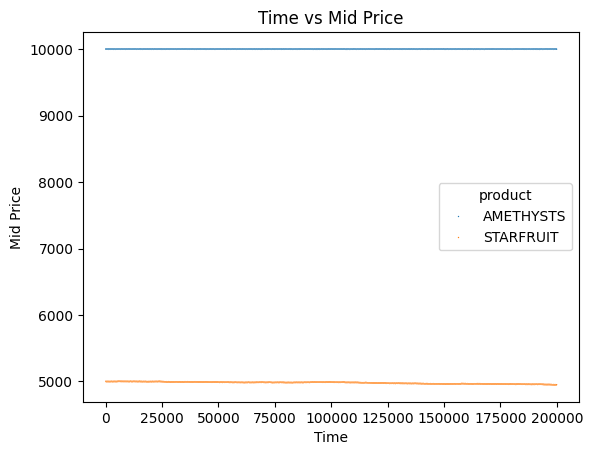

In [6]:
sns.scatterplot(data=df, x='timestamp', y='mid_price', hue='product', s = 1)
plt.title('Time vs Mid Price')
plt.xlabel('Time')
plt.ylabel('Mid Price')

Text(0, 0.5, 'Mid Price')

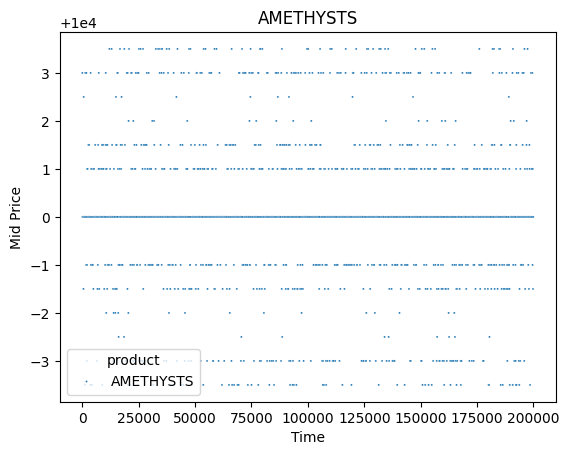

In [7]:
sns.scatterplot(data=df[df['product'] == 'AMETHYSTS'], x='timestamp', y='mid_price', hue='product', s = 2)
plt.title('AMETHYSTS')
plt.xlabel('Time')
plt.ylabel('Mid Price')

Text(0, 0.5, 'Mid Price')

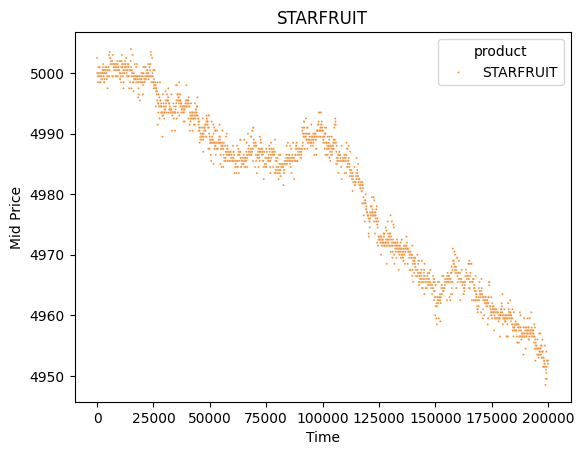

In [8]:
sns.scatterplot(data=df[df['product'] == 'STARFRUIT'], x='timestamp', y='mid_price', hue='product', s = 2, palette=['#fa8825'])
plt.title('STARFRUIT')
plt.xlabel('Time')
plt.ylabel('Mid Price')

In [9]:
def find_average(row):
    return sum([row['bid_price_1'] * row['bid_volume_1'], row['bid_price_2'] * row['bid_volume_2'],
row['bid_price_3'] * row['bid_volume_3'], row['ask_price_3'] * row['ask_volume_3'], row['ask_price_2'] * row['ask_volume_2'],
 row['ask_price_1'] * row['ask_volume_1'] ]) / sum([row['bid_volume_1'], row['bid_volume_2'], row['bid_volume_3'],
                                                  row['ask_volume_1'], row['ask_volume_2'], row['ask_volume_3']])


df['avg_price'] = df.apply(find_average, axis=1)

In [10]:
print(sum([df.loc[3995, 'bid_volume_1'], df.loc[3995, 'bid_volume_2'], df.loc[3995, 'bid_volume_3'], df.loc[3995, 'ask_volume_1'], df.loc[3995, 'ask_volume_2'], df.loc[3995, 'ask_volume_3']]))

62.0


In [11]:
df[df['product'] == 'STARFRUIT'].to_csv('starfruit_my_trades.csv', index = False)

In [12]:
df.replace(0, np.nan, inplace=True)

In [13]:
lowest_ask = df[["ask_price_1", "ask_price_2", "ask_price_3"]].min(axis=1)

highest_bid = df[["bid_price_1", "bid_price_2", "bid_price_3"]].min(axis=1)

spread = lowest_ask - highest_bid

df['spread'] = spread

Text(0, 0.5, 'Price')

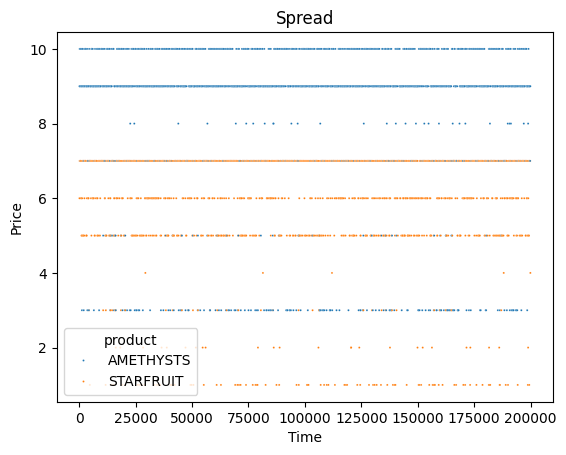

In [14]:
sns.scatterplot(data=df, x='timestamp', y='spread', hue='product', s = 2)
plt.title('Spread')
plt.xlabel('Time')
plt.ylabel('Price')

## Finding EMA

In [15]:


def calculate_ema(col_name: str, time = 3):
    for product in df['product'].unique():
        df[col_name + f"_{product}"] = df[df['product'] == str(product)]['mid_price'].ewm(span = time, adjust = False).mean()
    # return df[df['product'] == product]


In [16]:
# df_star = calculate_ema(product= "STARFRUIT", col_name="ema3")
calculate_ema(col_name="ema3", time=3)
calculate_ema(col_name="ema7", time=7)
calculate_ema(col_name="ema20", time=20)
calculate_ema(col_name="ema100", time=100)

Text(0, 0.5, 'PRICE')

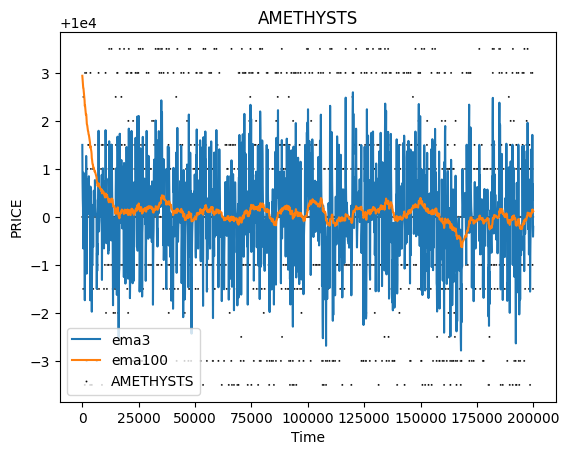

In [17]:
sns.lineplot(data=df[df['product'] == 'AMETHYSTS'].iloc[:2000], x='timestamp', y='ema3_AMETHYSTS', label='ema3')
sns.lineplot(data=df[df['product'] == 'AMETHYSTS'].iloc[:2000], x='timestamp', y='ema100_AMETHYSTS', label='ema100')
sns.scatterplot(data=df[df['product'] == 'AMETHYSTS'].iloc[:2000], x='timestamp', y='mid_price', hue='product', s = 2, palette=['#000000'])
plt.title('AMETHYSTS')
plt.xlabel('Time')
plt.legend()
plt.ylabel('PRICE')

Text(0, 0.5, 'PRICE')

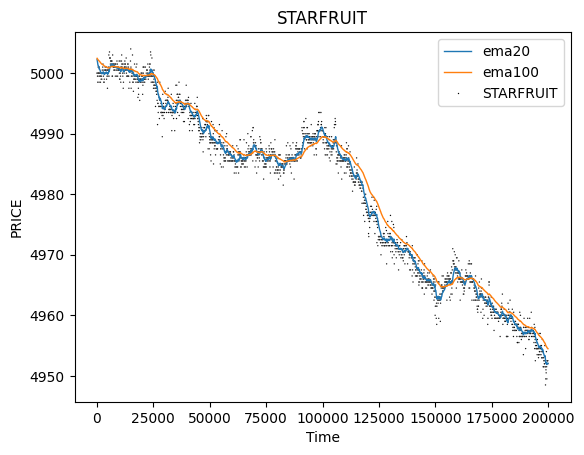

In [18]:
sns.lineplot(data=df[df['product'] == 'STARFRUIT'].iloc[:2000], x='timestamp', y='ema20_STARFRUIT', label='ema20', linewidth=1)
sns.lineplot(data=df[df['product'] == 'STARFRUIT'].iloc[:2000], x='timestamp', y='ema100_STARFRUIT', label='ema100', linewidth=1)
sns.scatterplot(data=df[df['product'] == 'STARFRUIT'].iloc[:2000], x='timestamp', y='mid_price', hue='product', s = 1, palette=['#000000'])
plt.title('STARFRUIT')
plt.xlabel('Time')
plt.legend()
plt.ylabel('PRICE')

![Image Title](screenshots/test1.png)